In [29]:
# Esc, потом d d = удалить ячейку

In [30]:
import pandas as pd

In [31]:
df = pd.read_excel("trips_data.xlsx")

In [32]:
df.head()

,Unnamed: 0,salary,city,age,vacation_preference,transport_preference,family_members,target
0,0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney


In [33]:
df.describe()

,Unnamed: 0,salary,age,family_members
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,111935.000000,55.209000,1.295000
std,288.819436,54580.049073,11.925164,0.885867
min,0.000000,0.000000,18.000000,0.000000
25%,249.750000,68000.000000,50.000000,1.000000
50%,499.500000,99000.000000,58.000000,1.000000
75%,749.250000,161000.000000,63.000000,2.000000
max,999.000000,250000.000000,82.000000,4.000000


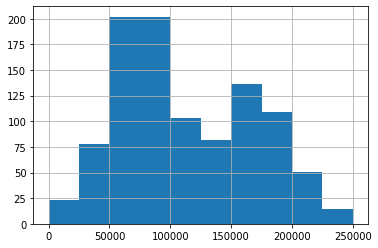

In [34]:
df.salary.hist()

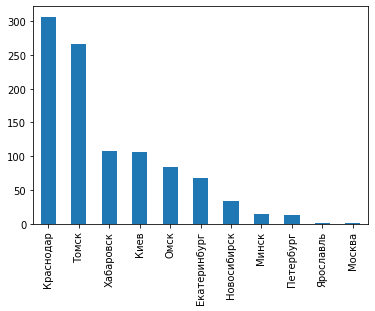

In [35]:
df.city.value_counts().plot(kind='bar')

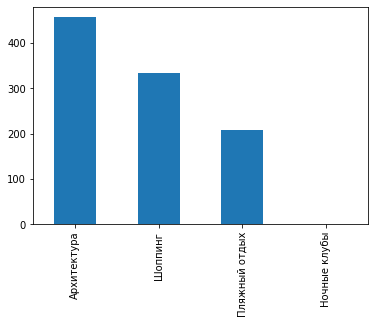

In [36]:
df.vacation_preference.value_counts().plot(kind='bar')

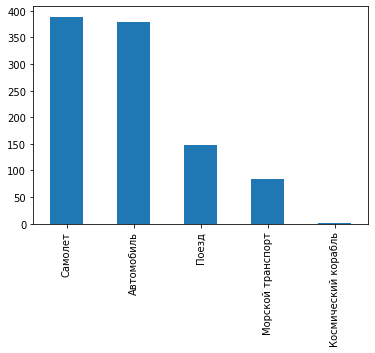

In [37]:
df.transport_preference.value_counts().plot(kind='bar')

In [38]:
transformed_df = pd.get_dummies(df, columns=['city', 'vacation_preference', 'transport_preference'])
transformed_df.head()

,Unnamed: 0,salary,age,family_members,target,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,0,196000,25,1,New York,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
1,1,152000,60,1,London,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2,83000,49,2,Sydney,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,3,161000,41,0,New York,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
4,4,146000,58,1,Sydney,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [39]:
X = transformed_df.drop('target', axis=1) # Все кроме колонки target, т.е. все те данные, которые мы используем для предсказания
y = transformed_df['target']

In [40]:
# Разделим выборку на 
# Обучающую — обучать модель, это наш "учебник"
# Проверочную — то чем мы проверям модель, это наш "экзамен"

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
# Делим выборку 30% — 70%

# RandomForest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
RFC = RandomForestClassifier(n_estimators=10) #параметры в скобочках
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
prediction = RFC.predict(X_test)

In [47]:
accuracy_score(y_test, prediction)

0.8333333333333334

# GradientBoosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
GBC = GradientBoostingClassifier(max_depth = 5, n_estimators = 150)

In [50]:
GBC.fit(X_train, y_train)
prediction = GBC.predict(X_test)
accuracy_score(y_test, prediction)

0.8133333333333334

# Важность колонок

In [51]:
important_columns = pd.Series(data=GBC.feature_importances_, index=X_train.columns)
important_columns.sort_values(ascending=False, inplace=True)

In [52]:
important_columns.head(10)

salary                                    0.244221
vacation_preference_Шоппинг               0.179926
age                                       0.166850
family_members                            0.119148
transport_preference_Самолет              0.095758
transport_preference_Морской транспорт    0.045720
Unnamed: 0                                0.037246
vacation_preference_Пляжный отдых         0.025914
city_Краснодар                            0.016078
transport_preference_Поезд                0.016052
dtype: float64

# Проверим на примере 

In [53]:
{col:0 for col in X_train.columns}

{'Unnamed: 0': 0,
 'salary': 0,
 'age': 0,
 'family_members': 0,
 'city_Екатеринбург': 0,
 'city_Киев': 0,
 'city_Краснодар': 0,
 'city_Минск': 0,
 'city_Москва': 0,
 'city_Новосибирск': 0,
 'city_Омск': 0,
 'city_Петербург': 0,
 'city_Томск': 0,
 'city_Хабаровск': 0,
 'city_Ярославль': 0,
 'vacation_preference_Архитектура': 0,
 'vacation_preference_Ночные клубы': 0,
 'vacation_preference_Пляжный отдых': 0,
 'vacation_preference_Шоппинг': 0,
 'transport_preference_Автомобиль': 0,
 'transport_preference_Космический корабль': 0,
 'transport_preference_Морской транспорт': 0,
 'transport_preference_Поезд': 0,
 'transport_preference_Самолет': 0}

In [54]:
example = {'salary': 250000,
 'age': 19,
 'family_members': 0,
 'city_Екатеринбург': 1,
 'city_Киев': 0,
 'city_Краснодар': 0,
 'city_Минск': 0,
 'city_Москва': 0,
 'city_Новосибирск': 0,
 'city_Омск': 0,
 'city_Петербург': 0,
 'city_Томск': 0,
 'city_Хабаровск': 0,
 'city_Ярославль': 0,
 'vacation_preference_Архитектура': 1,
 'vacation_preference_Ночные клубы': 0,
 'vacation_preference_Пляжный отдых': 0,
 'vacation_preference_Шоппинг': 0,
 'transport_preference_Автомобиль': 0,
 'transport_preference_Космический корабль': 0,
 'transport_preference_Морской транспорт': 1,
 'transport_preference_Поезд': 0,
 'transport_preference_Самолет': 0}

In [55]:
example_df = pd.DataFrame(data=[example])
example_df.head()

,salary,age,family_members,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,city_Омск,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,250000,19,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [56]:
GBC.predict(example_df)

ValueError: Number of features of the model must match the input. Model n_features is 24 and input n_features is 23 

In [ ]:
proba = pd.Series(data=GBC.predict_proba(example_df)[0], index=GBC.classes_)
proba.sort_values(ascending=False, inplace=True)

In [ ]:
proba